# Course Recommender System
## DS5230 Course Project
### By: Camellia Debnath, Praharsha Singaraju, Viral Pandey

In [24]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

from sklearn.manifold import TSNE

#Custom classes
from EDA import Eda
from VECTORIZE import Vectorize
import scrape_neu
import text_util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
indeed_raw = pd.read_csv('data/indeed-dataset-data-scientistanalystengineer/indeed_job_dataset.csv')
msds_df = scrape_neu.scrape_neu_catalog('ds')
msda_df = scrape_neu.scrape_neu_catalog('da')
msde_df = scrape_neu.scrape_neu_catalog('de')

In [6]:
clean_indeed_df = indeed_raw.copy()
clean_indeed_df['Description'] = clean_indeed_df['Description'].apply(text_util.clean_html_text)
clean_indeed_df['Description'] = clean_indeed_df['Description'].apply(text_util.preprocess_text, remove_period=True)

### Exploratory Analysis

In [8]:
indeed_raw.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


### Confirming the number of distinct job titles in the dataset

In [9]:
np.set_printoptions(threshold=100)
print('number of distinct job titles: ',len(indeed_raw.Job_Title.unique()))
print(indeed_raw.Job_Title.unique())

number of distinct job titles:  2314
['Data Scientist' 'Graduate Studies Program - Data Scientist'
 'Data Scientist I' ...
 'Executive Director- Architect: Data Engineering & Hybrid Clo...'
 'Senior Manager, Data Engineering (hands on)'
 'Principal Visual Analytics / Big Data Engineer (TS/SCI w/ Po...']


#### We can see that there are total of 2314 distinct job descriptions. This seems to be a big number if we look at the job descriptions, they mostly have some descriptions related to the domain. Hence, we can identify top bi-grams and tri-grams to get an idea about the most frequent job types.

In [10]:
eda = Eda()
freq_dict = defaultdict(int)
for row in indeed_raw.Job_Title:
    words = eda.generate_ngrams(row, n_gram=2)
    for word in words:
        freq_dict[word] += 1
bi_gram= pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
bi_gram.columns = ["word", "wordcount"]
bi_gram = bi_gram.head(10)

freq_dict = defaultdict(int)
for row in indeed_raw.Job_Title:
    words = eda.generate_ngrams(row, n_gram=3)
    for word in words:
        freq_dict[word] += 1
tri_gram = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
tri_gram.columns = ["word", "wordcount"]
tri_gram = tri_gram.head(10)


Text(0.5, 0, 'Word count')

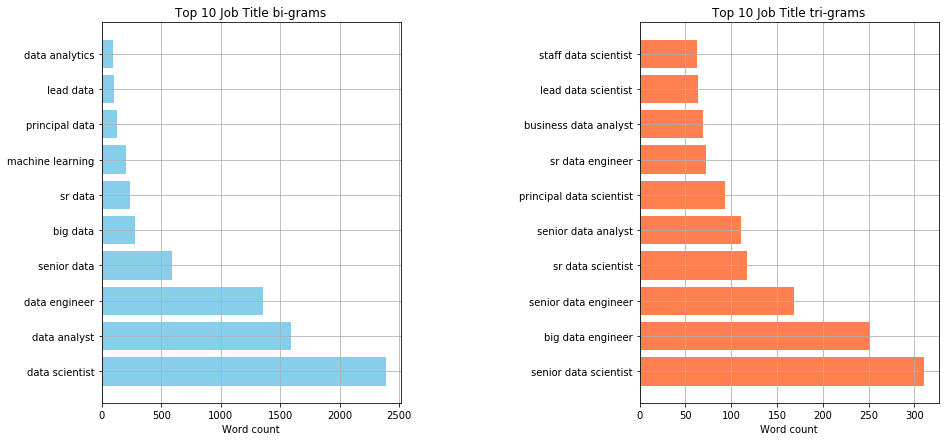

In [11]:
fig = plt.figure(figsize=(15, 7))
plt.tight_layout()

plt.subplot(1,2,1)
plt.barh(bi_gram.word, bi_gram.wordcount, color='skyblue')
plt.grid()
plt.title('Top 10 Job Title bi-grams')
plt.xlabel('Word count')
plt.subplots_adjust(wspace = 0.8)

plt.subplot(1,2,2)
plt.barh(tri_gram.word, tri_gram.wordcount, color='coral')
plt.grid()
plt.title('Top 10 Job Title tri-grams')
plt.xlabel('Word count')

#### Now let us do an n-gram analysis of the skills.

Text(0.5, 0, 'Word count')

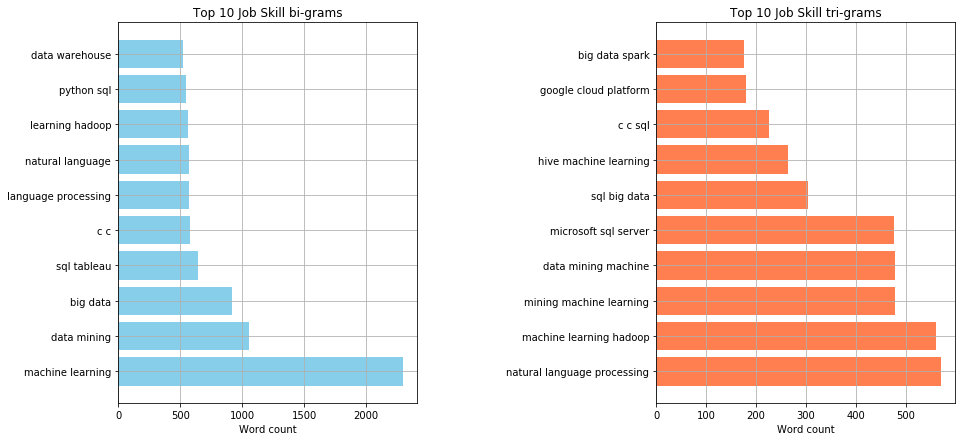

In [12]:
eda = Eda()
freq_dict = defaultdict(int)
for row in indeed_raw.Skill:
    words = eda.generate_ngrams(row, n_gram=2)
    if words:
        for word in words:
            freq_dict[word] += 1
bi_gram= pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
bi_gram.columns = ["word", "wordcount"]
bi_gram = bi_gram.head(10)

freq_dict = defaultdict(int)
for row in indeed_raw.Skill:
    words = eda.generate_ngrams(row, n_gram=3)
    if words:
        for word in words:
            freq_dict[word] += 1
tri_gram = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
tri_gram.columns = ["word", "wordcount"]
tri_gram = tri_gram.head(10)


fig = plt.figure(figsize=(15, 7))
plt.tight_layout()

plt.subplot(1,2,1)
plt.barh(bi_gram.word, bi_gram.wordcount, color='skyblue')
plt.grid()
plt.title('Top 10 Job Skill bi-grams')
plt.xlabel('Word count')
plt.subplots_adjust(wspace = 0.8)

plt.subplot(1,2,2)
plt.barh(tri_gram.word, tri_gram.wordcount, color='coral')
plt.grid()
plt.title('Top 10 Job Skill tri-grams')
plt.xlabel('Word count')

### Finding how many job descriptions prefer PHD

In [13]:
from collections import Counter

dict1={}
for s in clean_indeed_df.Description:
    if s:
        for eachStr in s:
            if eachStr.lower() in dict1.keys():
                count = dict1[eachStr]
                count = count + 1
                dict1[eachStr.lower()] = count
            else:
                dict1[eachStr.lower()] = 1



In [14]:
print(len(indeed_raw.Skill))

5715


In [15]:
for i in sorted (dict1.keys()) : 
    if 'phd' in i:
        print(i,': ',dict1[i]) 


fashionphd :  1
graphdb :  16
orphd :  2
phd :  793
phdproject :  1
plusphd :  1
pysparkphd :  2


In [16]:
print(dict1['phd'])

793


# Vectorize the data

### Word2Vec

In [21]:
vector = Vectorize()
vectorized_description = vector.w2v(clean_indeed_df, 'Description')

In [22]:
vectorized_description.shape

(12878, 100)

### t-SNE

In [25]:
tsneFrame = pd.DataFrame(TSNE(n_components=2, perplexity = 30).fit_transform(vectorized_description))